# Project Part 2

In this four-part project, we will explore what features make a good cup of coffee using reviews gathered from the Coffee Quality Institute by Data Scientist James LeDoux.

Part 2 is a continuation of the **Unit 1: Synthesis Assignment**. Please review and correct any issues that might've been highlighted in Part 1 before proceeding with Part 2. Failure to do so may lead to additional problems.

**By the end of this activity, you will:**

-   Complete Exploratory Data Analysis (EDA) on the dataset with:
    - Descriptive statistics for each variable and output interpretations.
    - Graphical illustration for each variable and output interpretations.
    - Descriptive statistics for each bivariate relationship and output interpretations.
    - Graphical illustration for each bivariate relationship and output interpretations.
-   Appropriately identify any missing/null/or invalid values and conduct appropriate remediation of the values if necessary.
-   Appropriately re-code any variables or values necessary to prepare for the inferential analysis.

**For full credit:**

- Only include libraries covered in this course and those you plan to use; don't include libraries you don't intend to use.
- Only include features relevant to your research question; don't include extraneous data and unnamed columns.
- Choose visualizations appropriate for the task at hand.
- Summarize the output of each visualization with your interpretations. Note any unusual patterns, outliers, and/or relationships observed.
- Accurately comment each code block.

**Acknowledgements**

Coffee Quality Database courtesy of [James LeDoux](https://github.com/jldbc/coffee-quality-database), the [Coffee Quality Institute](https://database.coffeeinstitute.org/), and [TidyTuesday](https://github.com/rfordatascience/tidytuesday/tree/master/data/2020/2020-07-07).

# Data Dictionary

|variable              |class     |description |
|:---------------------|:---------|:-----------|
|total_cup_points      |double    | Total rating/points (0 - 100 scale) |
|species               |character | Species of coffee bean (arabica or robusta) |
|owner                 |character | Owner of the farm |
|country_of_origin     |character | Where the bean came from |
|farm_name             |character | Name of the farm |
|lot_number            |character | Lot number of the beans tested |
|mill                  |character | Mill where the beans were processed |
|ico_number            |character | International Coffee Organization number |
|company               |character | Company name |
|altitude              |character | Altitude |
|region                |character | Region where bean came from |
|producer              |character | Producer of the roasted bean |
|number_of_bags        |double    | Number of bags tested |
|bag_weight            |character | Bag weight tested |
|in_country_partner    |character | Partner for the country |
|harvest_year          |character | When the beans were harvested (year) |
|grading_date          |character | When the beans were graded|
|owner_1               |character | Who owns the beans|
|variety               |character | Variety of the beans |
|processing_method     |character | Method for processing|
|aroma                 |double    | Aroma grade * |
|flavor                |double    | Flavor grade * |
|aftertaste            |double    | Aftertaste grade * |
|acidity               |double    | Acidity grade  * |
|body                  |double    | Body grade * |
|balance               |double    | Balance grade * |
|uniformity            |double    | Uniformity grade * |
|clean_cup             |double    | Clean cup grade * |
|sweetness             |double    | Sweetness grade * |
|cupper_points         |double    | Cupper Points|
|moisture              |double    | Moisture Grade * |
|category_one_defects  |double    | Category one defects (count) * |
|quakers               |double    | quakers|
|color                 |character | Color of bean |
|category_two_defects  |double    |Category two defects (count) * |
|expiration            |character | Expiration date of the beans |
|certification_body    |character | Who certified it |
|certification_address |character | Certification body address |
|certification_contact |character | Certification contact |
|unit_of_measurement   |character | Unit of measurement |
|altitude_low_meters   |double    | Altitude low meters|
|altitude_high_meters  |double    | Altitude high meters |
|altitude_mean_meters  |double    | Altitude mean meters |

\* denotes **Quality Measures**

## Task 1: Reaffirm your research question

Review the research question you selected in **Unit 1 Synthesis Assignment: Task 2**. Since you have already worked on your data, continuing with the same question is recommended. You are, however, free to change your question; keep in mind this will require additional work.

<br>

---

The research question I chose previously was to answer: Are there significant differences in coffees grown at different altitudes and/or different counties?



---



## Task 2:  Setup workspace

Import your altered project data from the end of the **Unit 1: Synthesis Assignment** and any libraries necessary to complete the exploratory data analysis steps outlined above. If you have selected a new research question, use the space below to download the dataset again and subset it by selecting only the features relevant to your research question.

In [64]:
#mounting google drive to get the 
from google.colab import drive
drive.mount('/content/gdrive')
#importing libraries (pandas, numpy, and seaborn)
import pandas as pd
import seaborn as sns
#importing data set from part 1
Coffee_sub = pd.read_csv('/content/gdrive/MyDrive/coffee_subset.csv')
#filtering data set to my research question and saving over the prior set with the further reduced subset
Coffee_sub = Coffee_sub[['species','country_of_origin','altitude','region','number_of_bags','bag_weight','variety','aroma','flavor','aftertaste','acidity','body','balance','uniformity','sweetness','moisture','category_one_defects','color','category_two_defects']]
#the above line is subsetted further from the final data set in part 1. To test differences in coffee compared to each region, I left species, quality attributes, volumes, and location variables to move forward with the analysis.

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Task 2: Obtain descriptive statistics

We previously looked into finding null/missing values, duplicate rows, explored data types, and obtained some descriptive statistics with this data. Now, we'll obtain descriptive statistics for all features of interests and their bivariate relationships.

**Things to do:**

- Display univariate descriptive statistics for all features using `describe()`. 
- Display bivariate descriptive statistics for all features using `corr()`.

**Optional:**

- Explore `skew()` and `kurtosis()` of each feature.

**References:**

- [pandas.DataFrame.describe](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
- [pandas.DataFrame.corr](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)
- [pandas.DataFrame.skew](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.skew.html)
- [pandas.DataFrame.kurtosis](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.kurtosis.html)
- [Bivariate Statistics](https://methods-sagepub-com.ezaccess.libraries.psu.edu/reference/the-sage-encyclopedia-of-communication-research-methods/i2187.xml) (Login Required)

In [3]:
#Using describe to generate descriptive statistics
Coffee_sub.describe()
#One thing to note from the above's results, for the quality measures listed, the average value is relatively high. Assuming these are rankings out of 10 (and most ranging from 0 to ~8.75), the averages are mostly around 7.5, with medians rated similarly. It seems like a lot of the people who elected to vote on these coffee qualities rated them quite well.

,number_of_bags,aroma,flavor,aftertaste,acidity,body,balance,uniformity,sweetness,moisture,category_one_defects,category_two_defects
count,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000
mean,154.182972,7.566706,7.520426,7.401083,7.535706,7.517498,7.518013,9.834877,9.856692,0.088379,0.479462,3.556385
std,129.987162,0.377560,0.398442,0.404463,0.379827,0.370064,0.408943,0.554591,0.616102,0.048287,2.549683,5.312541
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000,10.000000,10.000000,0.090000,0.000000,0.000000
50%,175.000000,7.580000,7.580000,7.420000,7.580000,7.500000,7.500000,10.000000,10.000000,0.110000,0.000000,2.000000
75%,275.000000,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,10.000000,10.000000,0.120000,0.000000,4.000000
max,1062.000000,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,10.000000,10.000000,0.280000,63.000000,55.000000


In [5]:
#Using corr to get the bivariate correlation
Coffee_sub.corr()

,number_of_bags,aroma,flavor,aftertaste,acidity,body,balance,uniformity,sweetness,moisture,category_one_defects,category_two_defects
number_of_bags,1.000000,-0.007040,0.002094,0.000473,0.029384,0.032897,0.032402,0.025492,0.002071,-0.053701,-0.079895,-0.001113
aroma,-0.007040,1.000000,0.813259,0.777056,0.723582,0.673006,0.708634,0.366578,0.253493,-0.134127,-0.096352,-0.149024
flavor,0.002094,0.813259,1.000000,0.895672,0.816688,0.735720,0.792290,0.410923,0.291065,-0.145201,-0.088792,-0.191956
aftertaste,0.000473,0.777056,0.895672,1.000000,0.792255,0.734306,0.809639,0.401456,0.266409,-0.180510,-0.104721,-0.210016
acidity,0.029384,0.723582,0.816688,0.792255,1.000000,0.706435,0.733017,0.375383,0.261854,-0.129079,-0.084269,-0.136814
body,0.032897,0.673006,0.735720,0.734306,0.706435,1.000000,0.757597,0.326879,0.268342,-0.147651,-0.044519,-0.085386
balance,0.032402,0.708634,0.792290,0.809639,0.733017,0.757597,1.000000,0.400915,0.283272,-0.199843,-0.082406,-0.171100
uniformity,0.025492,0.366578,0.410923,0.401456,0.375383,0.326879,0.400915,1.000000,0.451083,0.013792,-0.105890,-0.145833
sweetness,0.002071,0.253493,0.291065,0.266409,0.261854,0.268342,0.283272,0.451083,1.000000,0.072699,-0.150810,-0.024998
moisture,-0.053701,-0.134127,-0.145201,-0.180510,-0.129079,-0.147651,-0.199843,0.013792,0.072699,1.000000,0.047535,0.132292


In [20]:
#Skew data to show the symmetry of each variable compared to a normal distribution
Coffee_sub.skew()
#It looks like most of the distributions have a negative skew value which means a heavier tail on the left side of the distribution. The Category 1 and 2 deffect categories are fairly large compared to the other distributions.

<ipython-input-20-4da273fc1722>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Coffee_sub.skew()


number_of_bags           0.313902
aroma                   -6.245393
flavor                  -5.195526
aftertaste              -4.790958
acidity                 -5.943259
body                    -6.796185
balance                 -4.783036
uniformity              -6.966567
sweetness               -7.559008
moisture                -0.992861
category_one_defects    15.061490
category_two_defects     3.667136
dtype: float64

In [18]:
#Now onto kurtosis
Coffee_sub.kurtosis()
#We can see pretty high kurtosis values for aroma, acidity, body, and category_one_defects, and very low values for number_of_bags and moisture.

<ipython-input-18-a907c9fc372b>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Coffee_sub.kurtosis()


number_of_bags            0.221701
aroma                   121.417313
flavor                   94.753230
aftertaste               83.556985
acidity                 116.139457
body                    129.933903
balance                  85.633518
uniformity               85.359784
sweetness                85.329691
moisture                 -0.170012
category_one_defects    308.715577
category_two_defects     20.082685
dtype: float64

## Task 3: Explore data graphically

Numeric statistics provide us with lots of useful information but some things are easier to spot visually. Use Seaborn to perform exploratory data analysis steps graphically.

**Things to do:**

- Create univariate plots for each feature.
- Create plots for all bivariate relationships.
- Illustrate bivariate descriptive statistics visually.

**References:**
- [Visualizing distributions of data](https://seaborn.pydata.org/tutorial/distributions.html)
- [Visualizing categorical data](https://seaborn.pydata.org/tutorial/categorical.html)
- [Visualizing statistical relationships](https://seaborn.pydata.org/tutorial/relational.html)

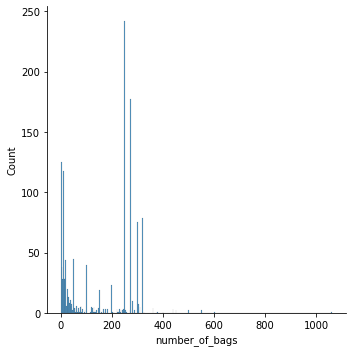

In [29]:
#Let's start with some displots
sns.displot(Coffee_sub, x="number_of_bags", binwidth=3)
#From the plot, it looks like we probably have an outlier. Most of the reported values are between 0 and 400 but are a couple above (~500, ~550, ~1100)

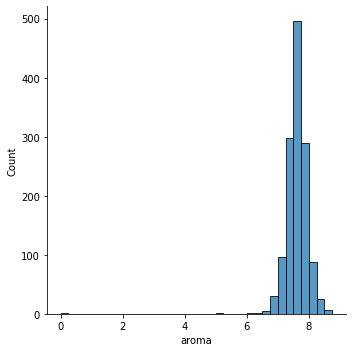

In [33]:
sns.displot(Coffee_sub, x="aroma", binwidth=0.25)
#Here we see a relatively normal distribution with one value at 0 and the majority centered around ~7

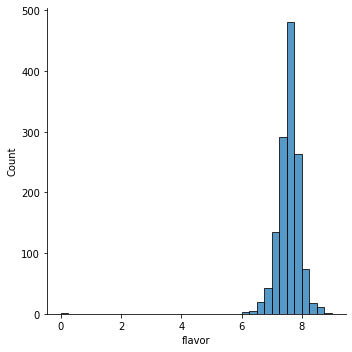

In [36]:
sns.displot(Coffee_sub, x="flavor", binwidth=0.25)
#This distribution is very similar to "aroma"

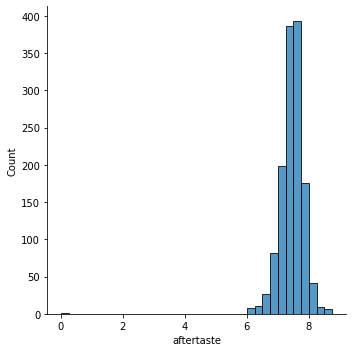

In [37]:
sns.displot(Coffee_sub, x="aftertaste", binwidth=0.25)

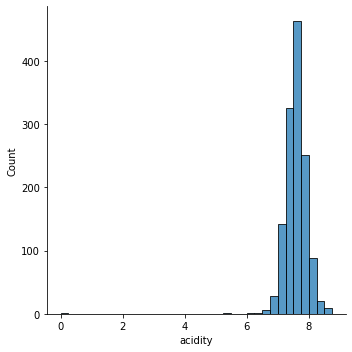

In [38]:
sns.displot(Coffee_sub, x="acidity", binwidth=0.25)

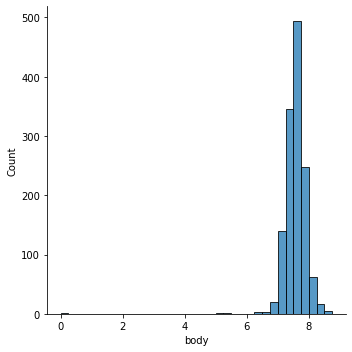

In [39]:
sns.displot(Coffee_sub, x="body", binwidth=0.25)

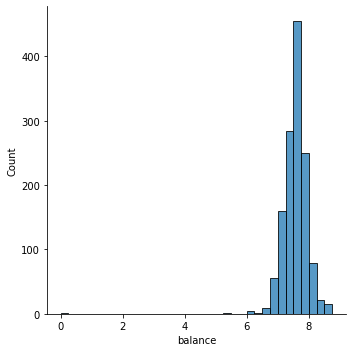

In [40]:
sns.displot(Coffee_sub, x="balance", binwidth=0.25)

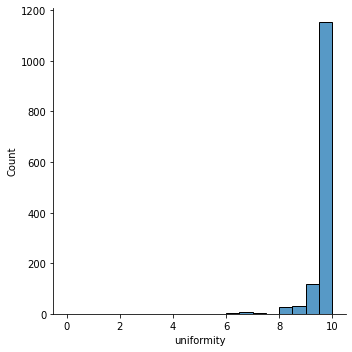

In [44]:
sns.displot(Coffee_sub, x="uniformity", binwidth=0.5)
#This distribution is heavily right-skewed, we can see most of the data in the 9.5 - 10 bin

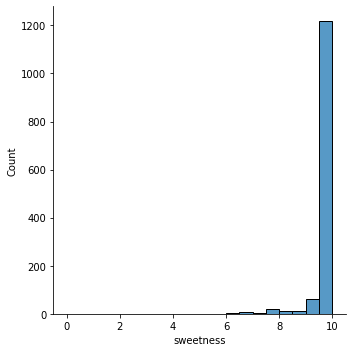

In [48]:
sns.displot(Coffee_sub, x="sweetness", binwidth=0.5)
#This follows a similar distribution to the uniformity plot

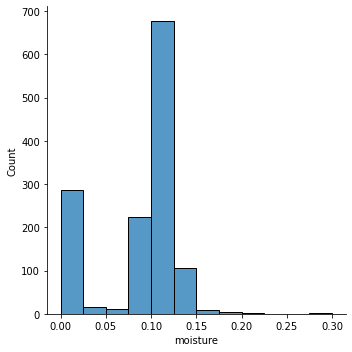

In [53]:
sns.displot(Coffee_sub, x="moisture", binwidth=0.025)
#Moisture looks bimodal here, with approximately 300 observatinos around the 0 mark and 700 around the 0.12 mark

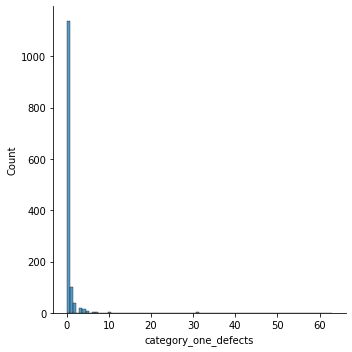

In [57]:
sns.displot(Coffee_sub, x="category_one_defects", binwidth=0.75)
#Here we can see most of the values gathered around zero

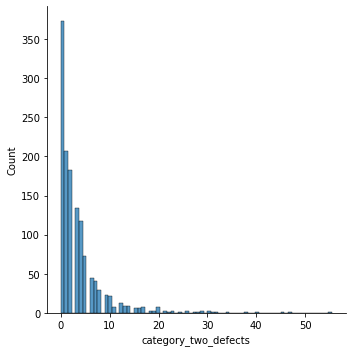

In [59]:
sns.displot(Coffee_sub, x="category_two_defects", binwidth=0.75)
#This is similar to the category one distribution, there are a lot ov observations gathered around zero and a noticable drop-off after the value 10

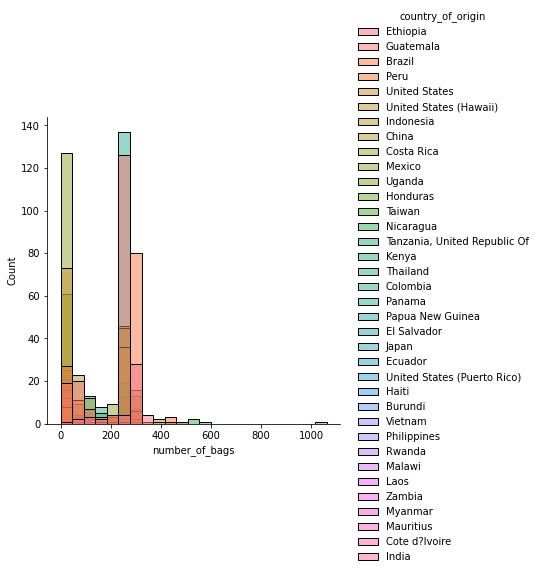

In [62]:
sns.displot(Coffee_sub, x="number_of_bags", hue="country_of_origin")
#This shows the relationship between the quantity of beans coming out of each country, just an interesting visual

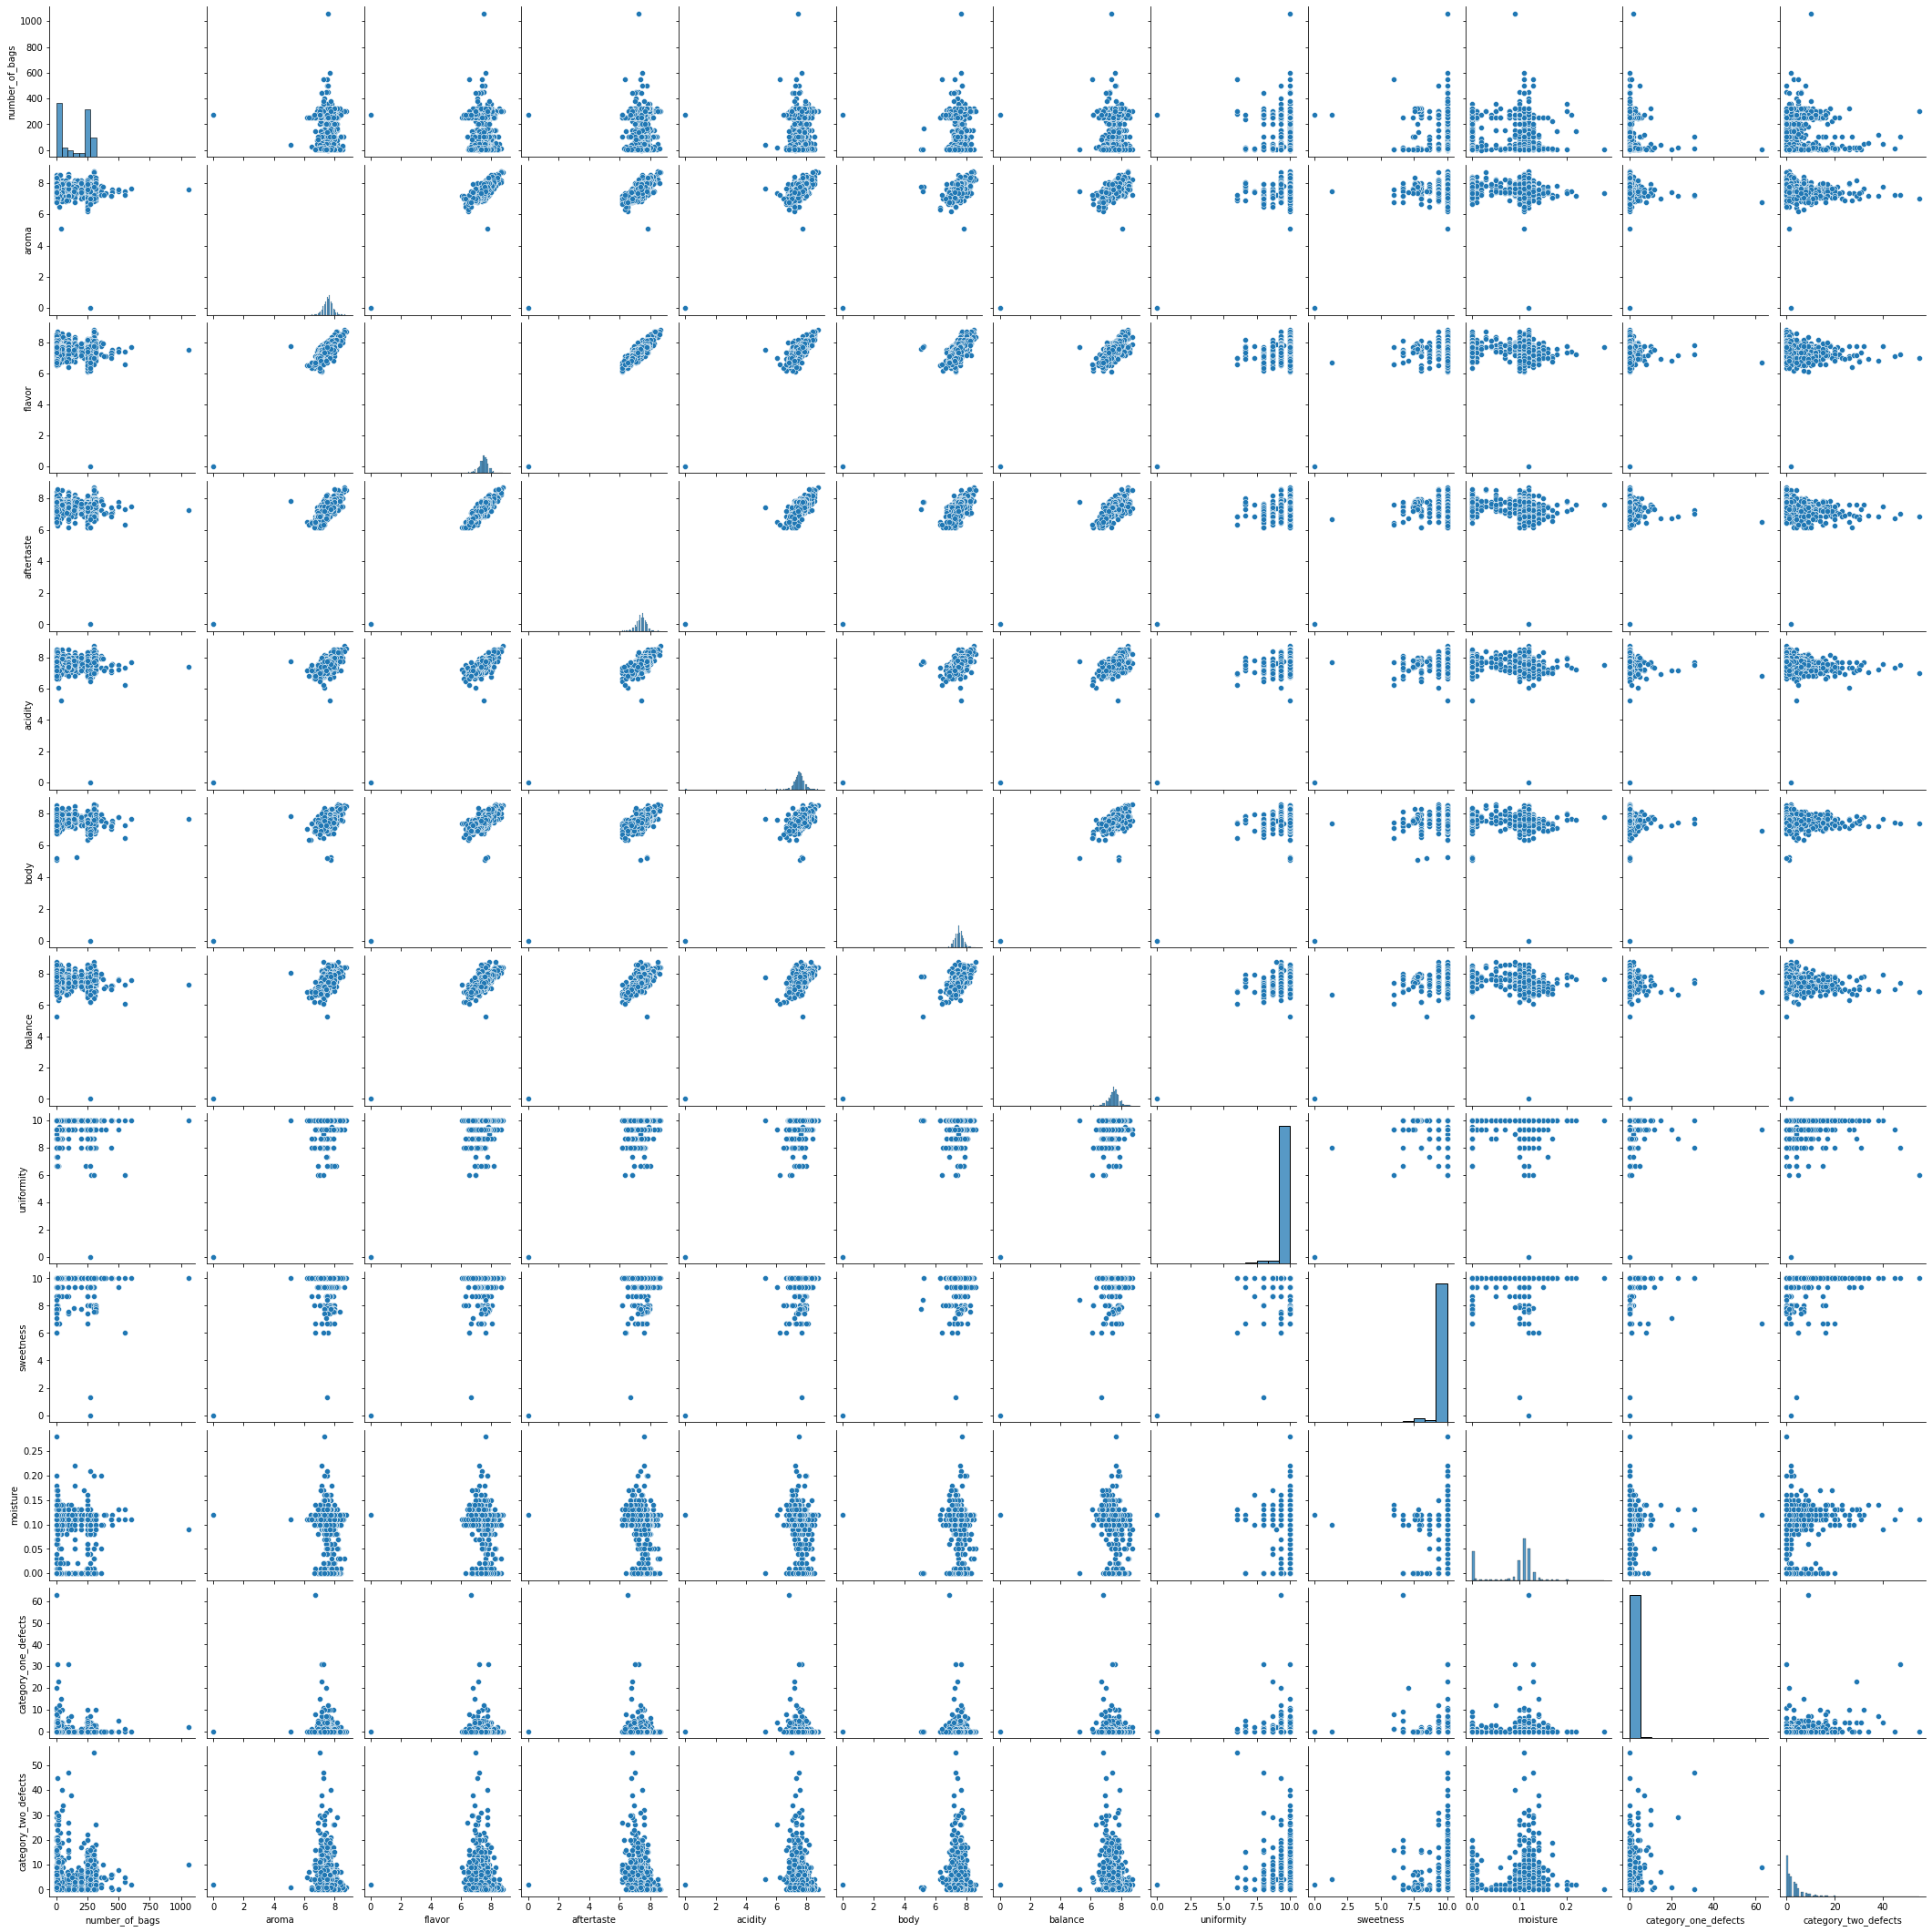

In [63]:
#Pairplots of the data set
sns.pairplot(data = Coffee_sub)
#this massive plot shows the relationships between all numeric variables in the data set. Interestingly, we don't see any plots with uniform data poitns which indicates that there is some sort of relationship between each on of the numeric variables

<AxesSubplot:>

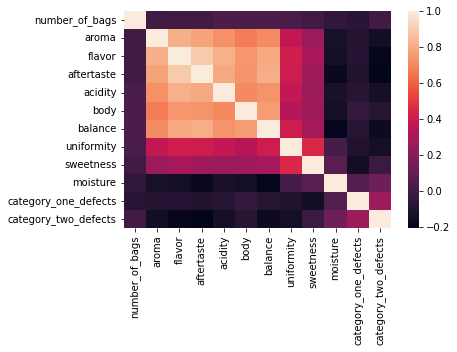

In [19]:
#We can further explain the relationships in a correlation plot 
sns.heatmap(data = Coffee_sub.corr())
#In the below, we note some interesting relationships. Obviously, we see that there is a negative relationship between the defect categories and the quality variables (a "better" cup of coffee would have less reported defects).
#Another relationship we see is that most of the quality measures have a positive relationship. From this, it seems like a higher quality cup of coffee has more highly rated attributes all around.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='aroma', ylabel='Density'>

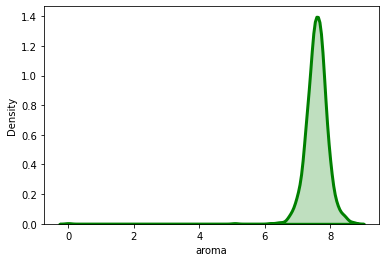

In [21]:
#Since the skew data we collected before only gives us the skew value, we'll pull up a few plots to illustrate the results a little more concretely.
sns.distplot(Coffee_sub['aroma'], hist=False, color='green', kde_kws = {'shade': True, 'linewidth': 3})

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='moisture', ylabel='Density'>

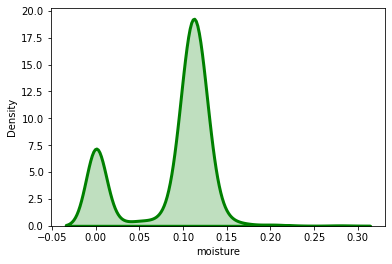

In [22]:
sns.distplot(Coffee_sub['moisture'], hist=False, color='green', kde_kws = {'shade': True, 'linewidth': 3})
#This plot is clearly bimodal, we can see the peak around the zero mark and one around the 0.12 mark (this matches with the histograms we called earlier)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='category_one_defects', ylabel='Density'>

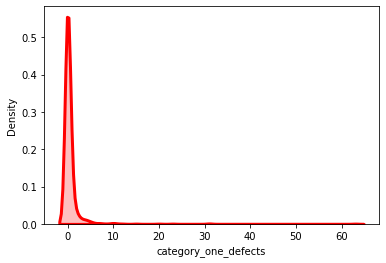

In [23]:
sns.distplot(Coffee_sub['category_one_defects'], hist=False, color='red', kde_kws = {'shade': True, 'linewidth': 3})

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='category_two_defects', ylabel='Density'>

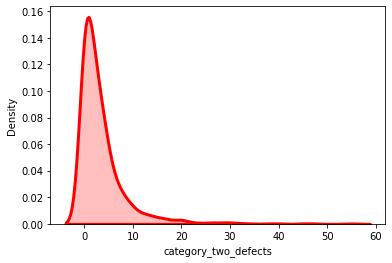

In [24]:
sns.distplot(Coffee_sub['category_two_defects'], hist=False, color='red', kde_kws = {'shade': True, 'linewidth': 3})

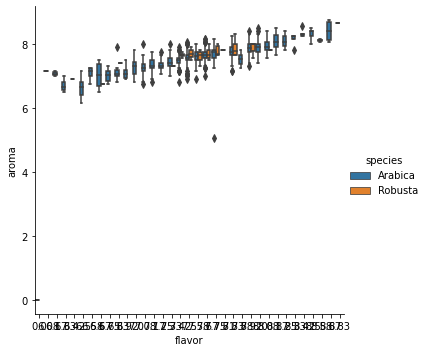

In [68]:
sns.catplot(data=Coffee_sub, x="flavor", y="aroma", hue="species", kind="box")

## Task 4: Prepare data for inferential analysis

Appropriately identify any missing/null/or invalid values and conduct remediation of the values if necessary. Re-code any variables or values to prepare for inferential analysis. If no remediatation necessary, please explain why below.

**Reference:**

- [Coding Systems for Categorical Variables in Regression Analysis](https://stats.oarc.ucla.edu/spss/faq/coding-systems-for-categorical-variables-in-regression-analysis/)

In [70]:
#Let's look at the missing values
Coffee_sub.isna().sum()
#We see that country_of_origin, altitude, region, variety, and color are the only variables with missing values.

species                   0
country_of_origin         1
altitude                226
region                   59
number_of_bags            0
bag_weight                0
variety                 226
aroma                     0
flavor                    0
aftertaste                0
acidity                   0
body                      0
balance                   0
uniformity                0
sweetness                 0
moisture                  0
category_one_defects      0
color                   218
category_two_defects      0
dtype: int64

In [73]:
Coffee_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   species               1339 non-null   object 
 1   country_of_origin     1338 non-null   object 
 2   altitude              1113 non-null   object 
 3   region                1280 non-null   object 
 4   number_of_bags        1339 non-null   int64  
 5   bag_weight            1339 non-null   object 
 6   variety               1113 non-null   object 
 7   aroma                 1339 non-null   float64
 8   flavor                1339 non-null   float64
 9   aftertaste            1339 non-null   float64
 10  acidity               1339 non-null   float64
 11  body                  1339 non-null   float64
 12  balance               1339 non-null   float64
 13  uniformity            1339 non-null   float64
 14  sweetness             1339 non-null   float64
 15  moisture             

In [74]:
#Since we have 1339 observations and 226 minimum rows with N/A values, I think it's safe to remove these observations without substantially effecting the analysis going forward.
Coffee_sub2 = Coffee_sub.dropna()

In [75]:
#Let's check this new data frame just to be sure:
Coffee_sub2.info()
#we clearly don't have any missing observations in this, but it did shave off 428 observations from the total data set

<class 'pandas.core.frame.DataFrame'>
Int64Index: 911 entries, 1 to 1333
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   species               911 non-null    object 
 1   country_of_origin     911 non-null    object 
 2   altitude              911 non-null    object 
 3   region                911 non-null    object 
 4   number_of_bags        911 non-null    int64  
 5   bag_weight            911 non-null    object 
 6   variety               911 non-null    object 
 7   aroma                 911 non-null    float64
 8   flavor                911 non-null    float64
 9   aftertaste            911 non-null    float64
 10  acidity               911 non-null    float64
 11  body                  911 non-null    float64
 12  balance               911 non-null    float64
 13  uniformity            911 non-null    float64
 14  sweetness             911 non-null    float64
 15  moisture              

## Task 5: Export data

Download your final DataFrame to your local machine or Google Drive.

In [77]:
Coffee_sub2.to_csv('/content/gdrive/MyDrive/Coffee_sub2.csv')